In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = "Verunglückte.csv"
table_fatal_inj = pd.read_csv(file, sep=';', 
                    skip_blank_lines=True,
                    header=[8, 9], 
                    encoding='ISO-8859-1',
                    engine='python',
                    skipfooter=3)
table_fatal_inj

Kategorie                                         \
          Jahr                               Fahrzeug   
0         2008  Kraftrad mit Versicherungskennzeichen   
1         2008  Kraftrad mit Versicherungskennzeichen   
2         2008  Kraftrad mit Versicherungskennzeichen   
3         2008  Kraftrad mit Versicherungskennzeichen   
4         2008  Kraftrad mit Versicherungskennzeichen   
...        ...                                    ...   
2907      2020                              Insgesamt   
2908      2020                              Insgesamt   
2909      2020                              Insgesamt   
2910      2020                              Insgesamt   
2911      2020                              Insgesamt   

                                                               männlich  \
                         Ortslage Schwere der Verletzung unter 15 Jahre   
0                       innerorts               Getötete              -   
1                       innerorts        Schwerverletzte             34   
2                       innerorts        Leichtverletzte            125   
3                       innerorts              Insgesamt            159   
4     außerorts (ohne Autobahnen)               Getötete              1   
...                           ...                    ...            ...   
2907               auf Autobahnen              Insgesamt            509   
2908                    Insgesamt               Getötete             25   
2909                    Insgesamt        Schwerverletzte           1898   
2910                    Insgesamt        Leichtverletzte          11399   
2911                    Insgesamt              Insgesamt          13322   

                                                                        \
     15 bis unter 18 Jahre 18 bis unter 21 Jahre 21 bis unter 25 Jahre   
0                        4                     4                     2   
1                      571                   210                   134   
2                     3224                  1326                   817   
3                     3799                  1540                   953   
4                        9                     3                     2   
...                    ...                   ...                   ...   
2907                   189                   885                  1467   
2908                    49                   129                   138   
2909                  1899                  2447                  2502   
2910                  8272                 11140                 12469   
2911                 10220                 13716                 15109   

                                                  ...             Insgesamt  \
     25 bis unter 35 Jahre 35 bis unter 45 Jahre  ... 18 bis unter 21 Jahre   
0                        2                     7  ...                     4   
1                      299                   373  ...                   296   
2                     1481                  1648  ...                  1953   
3                     1782                  2028  ...                  2253   
4                        2                     8  ...                     4   
...                    ...                   ...  ...                   ...   
2907                  3489                  2502  ...                  1672   
2908                   288                   239  ...                   157   
2909                  5177                  4365  ...                  3793   
2910                 26736                 21128  ...                 19689   
2911                 32201                 25732  ...                 23639   

                                                                        \
     21 bis unter 25 Jahre 25 bis unter 35 Jahre 35 bis unter 45 Jahre   
0                        2                     2                     8   
1                      185                   367                   469   


In [3]:
# vehicles = table_fatal_inj['Kategorie', 'Fahrzeug'].unique() # get vehicle
# print(vehicles)
# fahrzeuge = np.delete(np.concatenate((f[:6], [f[-1]])), 2)
# fahrzeuge = f[0]
vehicles = ['Fahrrad', 'Kraftrad mit amtlichem Kennzeichen', 'Personenkraftwagen', 'Kraftomnibus', 'Güterkraftfahrzeug', 'Fußgänger', 'Insgesamt']

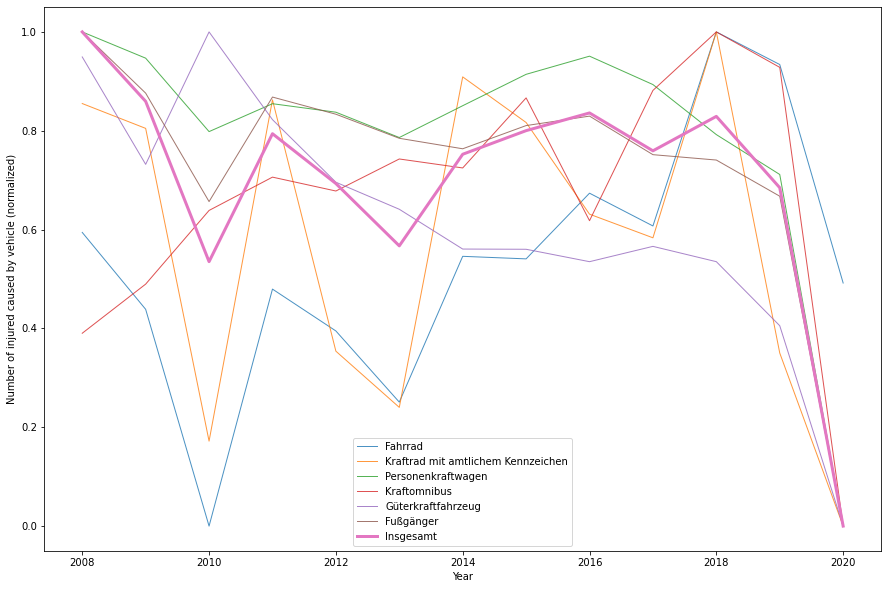

In [4]:
plt.figure(figsize=(15, 10))
for vehicle in vehicles:
    acc_total_table = table_fatal_inj.loc[(table_fatal_inj['Kategorie','Fahrzeug'] == vehicle)
                          & (table_fatal_inj['Kategorie','Schwere der Verletzung'] == 'Insgesamt')
                          & (table_fatal_inj['Kategorie','Ortslage'] == 'Insgesamt')]

    years = acc_total_table['Kategorie','Jahr'].astype(int)
    acc_total = acc_total_table['Insgesamt', 'Insgesamt'].astype(int)#.to_frame()# .astype(int)
    acc_total = (acc_total-acc_total.min())/(acc_total.max()-acc_total.min()) # min max normalized

    if vehicle == 'Insgesamt':
        plt.plot(years, acc_total, linewidth=3, alpha=1, label=vehicle)
    else:
        plt.plot(years, acc_total, linewidth=1, alpha=0.8, label=vehicle)
plt.xlabel('Year')
plt.ylabel('Number of injured caused by vehicle (normalized)')
plt.legend()
# plt.savefig("./imgs/injured_by_vehicle.pdf", bbox_inches='tight') # save plot as pdf
plt.show()

In [5]:
prob_killed = {}

for vehicle in vehicles[:-1]:
    t = table_fatal_inj.loc[(table_fatal_inj['Kategorie','Fahrzeug'] == vehicle)
                              & ((table_fatal_inj['Kategorie','Schwere der Verletzung'] == 'Getötete') 
                              | (table_fatal_inj['Kategorie','Schwere der Verletzung'] == 'Insgesamt'))
                              & (table_fatal_inj['Kategorie','Ortslage'] == 'Insgesamt')
                              & (table_fatal_inj['Kategorie','Jahr'] == 2019)]
    
    total = t.loc[(t['Kategorie', 'Schwere der Verletzung'] == 'Insgesamt')]['Insgesamt', 'Insgesamt'].values.astype(int)
    killed = t.loc[(t['Kategorie', 'Schwere der Verletzung'] == 'Getötete')]['Insgesamt', 'Insgesamt'].values.astype(int)
    prob_killed[vehicle] = ((killed / total) * 100)[0]

prob_killed

{'Fahrrad': 0.5094914245151244,
 'Kraftrad mit amtlichem Kennzeichen': 1.9407741612060012,
 'Personenkraftwagen': 0.6573715739808089,
 'Kraftomnibus': 0.11199999999999999,
 'Güterkraftfahrzeug': 1.7059483726150393,
 'Fußgänger': 1.3788314651324274}